# 11 - Propensity Score

## 성장의 심리학

긍정심리학 분야는 인간 행동 중 성공적인 삶으로 이끄는 요소를 연구하는 분야입니다. 여러분은 이 학문을 통계의 엄격성과 자기계발서의 교차점이라고 생각하시면 됩니다. 긍정심리학의 유명한 발견 중 하나는 성장 마인드입니다. 이는 사람들이 **성장적 사고방식**(Growth Mindset)을 갖거나, 이와 반대로 고정적인 사고방식(Fixed)을 가질 수 있다는 것입니다. 여러분이 만약 고정적인 사고방식을 가진다면, 본인의 능력은 태어날 때나 혹은 어릴 때 결정된 것이라고 믿을 수 있습니다. 이와 같이, 발전 시킬 수 있는 지능은 고정된 것이며 바꿀 수 없는 것이라고 믿을 것입니다. 이러한 사고 방식은 만약에 당신이 "지능"을 지금 현재 가지지 못하고 있다면, 이후에도 얻을 수 없다는 생각과 같습니다. 이 사고 방식의 결론은 당신이 뛰어나지 않은 분야에 시간을 낭비해서는 안된다는 것입니다. 왜냐하면 당신은 그것들을 다루는 법을 결코 배울 수 없을 것이기 때문이죠. 반면에 성장 마인드셋 즉, 그로스 마인드를 가지고 있다면 지능은 발전시킬 수 있는 것이라고 믿습니다. 그리고 실패의 결과는 끈기의 부족이 아니라 학습 과정의 일부로 보는 것입니다. 

여기서 어떠한 마인드셋이 더 올바른지 논쟁하지는 않을 것입니다. 중요한 것은 심리학자들은 성장 마인드를 가진 사람들이 삶에서 더 잘 하는 경향이 있다는 것을 알아냈다는 것입니다. 이러한 마인드셋을 가진 사람들이 본인이 하기로 한 것을 성취할 가능성이 더 높습니다. 

인과 추론에서 우리는 위에서 말한 진술들을 회의적으로 보는 방법을 배웠습니다. 과연 성장 마인드가 사람들로 하여금 더 많은 것을 성취하도록 만드는 것인가? 아니면 단순히 더 많은 것을 성취한 사람들이 성공의 결과로 성장 마인드를 기르기 쉬운 경우인가? 즉, 계란이 먼저냐 닭이 먼저냐?의 문제죠. potential outcome의 에서, 우리는 위에서 말한 문장에 약간의 Bias가 있다고 믿는 이유가 있습니다. 
$Y(0)|T=1]$는 아마도 $Y(0)|T=0]$ 보다 크다는 것입니다. 이는 고정된 마인드 셋을 가진 사람보다 성장 마인드셋을 가진 사람이 더욱 많은 것을 성취했을 것이라는 것을 의미합니다. 

문제를 해결하기 위해, 연구원들은 [학습의 마인드셋에 대한 국가 연구](https://mindsetscholarsnetwork.org/about-the-network/current-initatives/national-mindset-study/#)를 설계했습니다. 이것은 성장 마인드셋을 찾는 것을 목표로 하는 미국 공립 고등학교에서 행해진 무작위 연구입니다. 학생들이 학교로부터 세미나를 받아 성장 마인드를 심어주는 방식입니다. 그런 다음, 그들은 학생들이 얼마나 학업적으로 잘했는지 측정하기 위해 세미나를 받은 사람들의 대학 생활을 추적합니다. 이 측정은 "성취도 점수"로 집계되어 표준화되어 있습니다. 이 연구의 실제 데이터는 학생들의 사생활을 보호하기 위해 공개되지 않지만, [Athey and Wager](https://arxiv.org/pdf/1902.07409.pdf)가 제공하는 동일한 통계적 속성을 공유하는 시뮬레이터 데이터 셋이 있으므로 대신 활용할 것입니다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from causalinference import CausalModel

import graphviz as gr

%matplotlib inline

style.use("fivethirtyeight")
pd.set_option("display.max_columns", 6)

처치된 변수와 결과 변수 이외에도, 몇 가지 다른 변수도 기록했습니다.

* schoolid : 학생의 학교 식발자
* success_expect: 미래의 성공에 대한 자체 기대 평가, 무작위 할당 이전에 측정된 선행 성과에 대한 프록시 변수로 활용
* ethnicity: 학생 인종에 대한 범주형 변수
* gender: 학생 성별에 대한 범주형 변수
* frst_in_family : 가족 중 최초로 대학에 진학했는지에 대한 범주형 범주
* school_urbanicity: 학교가 도시에 위치해 있는지에 대한 범주형 변수(시골, 교외 등)
* school_mindset: 무작위 배정 전에 보고된 학생들의 고정된 마인드셋에 대한 학교 레벨의 평균값(표준화)
* school_achievement: 시험 점수와 4개의 코호트에 대한 대학 진학 준비성로 측정한 학교 성취도(표준화)
* school_ethnic_minority: 학교 인종/민족 소수자 구성, 즉 흑인, 라틴계 또는 아메리카 원주민 학생 비율(표준화)
* school_poverty: 소득이 빈곤선 아래로 떨어지는 가정의 학생 비율(표준화)
* school_size: 학교 내 4학년 전체 학생 수(표준화)

In [2]:
data = pd.read_csv("./data/learning_mindset.csv")
data.sample(5, random_state=5)

,schoolid,intervention,achievement_score,...,school_ethnic_minority,school_poverty,school_size
259,73,1,1.480828,...,-0.515202,-0.169849,0.173954
3435,76,0,-0.987277,...,-1.310927,0.224077,-0.426757
9963,4,0,-0.152340,...,0.875012,-0.724801,0.761781
4488,67,0,0.358336,...,0.315755,0.054586,1.862187
2637,16,1,1.360920,...,-0.033161,-0.982274,1.591641


무작위 연구이지만, 해당 데이터에 교란 요인이 없다고 말할 수 없습니다. 추가적인 특징을 살펴보면, 처치 그룹과 통제 그룹 사이에 차이가 있다는 것을 알 수 있습니다. 이에 대한 한 가지 가능한 이유는 처치 변수가 학생의 세미나 참여 여부로 측정되었기 때문입니다. 그래서 참여의 기회가 무작위로 이루어졌음에도 불구하고 참여 자체는 그렇지 않을 수 있습니다. 우리는 여기서 "non-compliance" 문제를 다루고 있습니다. 이에 대한 한가지 증거는 학생의 성공 기대치가 세미나 참여와 어떻게 상관관계가 있는지에 대한 여부입니다. 자기계발 성공기대도가 높은 학생들은 성장 마인드 세미나 참여했을 가능성이 높기 때문이죠.

In [36]:
data.groupby("success_expect")["intervention"].mean()

success_expect
1    0.271739
2    0.265957
3    0.294118
4    0.271617
5    0.311070
6    0.354287
7    0.362319
Name: intervention, dtype: float64

$E[Y(0)|T=1]$와 $E[Y(0)|T=0]$의 값이 어떻게 차이가 나는지 봅시다. 이 평균값은 두 그룹을 비교하는데 Baseline이 될 수도 있습니다.

In [37]:
smf.ols("achievement_score ~ intervention", data=data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.1538,0.012,-13.201,0.000,-0.177,-0.131
intervention,0.4723,0.020,23.133,0.000,0.432,0.512


개입이 있는 경우와 없는 경우를 단순히 비교하면, Treatment를 받는 사람의 성취도 점수가 평균보다 0.3185 (0.4723 - 0.1538)점 더 높다는 것을 알 수 있습니다. 여기서의 0.3185의 차이는 어느 정도일까요?
표준화된 결과이기 때문에 결과를 해석하기 어렵습니다.

표준화된 결과는 변수가 표준 편차로 측정된다는 것을 의미합니다. 따라서 Treatment를 받은 그룹은 Treatment를 받지 않은 그룹보다 0.3185만큼 표준 편차가 큽니다. 

정규분포를 한 번 떠올려 봅시다. 우리는 정규분포의 95%가 2 표준편차 안에 있으며, Two-tail 각각 2.5% 만큼을 제외한 값입니다. 만약에 어떤 사람이 평균보다 2 표준 편차가 크면 전체의 97.5%(95% + one-tail 2.5%)가 그 사람보다 아래애 있다는 것을 의미합니다. Normal CDF를 보면 약 85%가 1 표준 편차 미만이고 70%가 약 0.5 표준 편차 미만이라는 것도 알 수 있습니다. 따라서 Treatment 그룹은 평균 표준화 점수가 약 0.5점이기 때문에 개인별 성취도에서 평균으로 부터 70%이상으로 떨어져 있다는 것을 의미합니다. 다른 말로 그들의 성취도는 약 상위 30% 안에 있다는 것을 의미합니다.

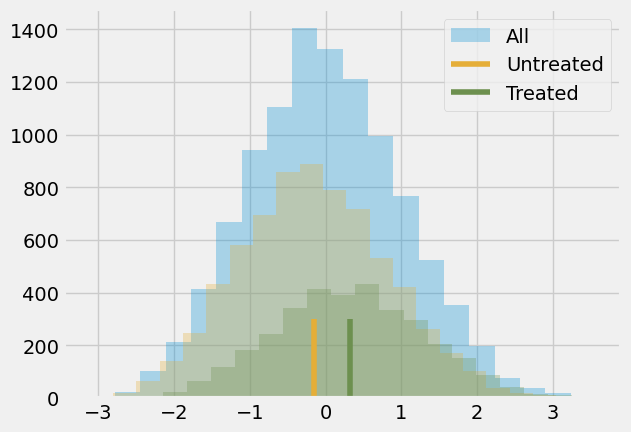

In [38]:
plt.hist(data["achievement_score"], bins=20, alpha=0.3, label="All")
plt.hist(data.query("intervention==0")["achievement_score"], bins=20, alpha=0.3, color="C2")
plt.hist(data.query("intervention==1")["achievement_score"], bins=20, alpha=0.3, color="C3")
plt.vlines(-0.1538, 0, 300, label="Untreated", color="C2")
plt.vlines(-0.1538+0.4723, 0, 300, label="Treated", color="C3")
plt.legend();

인과 추론을 배우고 있는 우리는 해당 결과가 합당하지 않다고 생각할 것입니다. 예상컨테, Treatment를 받은 그룹과 Treatment 받지 않은 그룹의 차이는 이것보다 작을 것입니다. 왜냐하면 편향이 Positive이기 때문이죠. 앞에서 어느정도 성공에 대해 야심이 있는 사람들이 세미나에 더 가고 싶다는 것을 보았기 때문에 그들이 세미나에 참석하지 않더라도 더 많은 것을 성취했을 것이니까요. 이러한 Bias를 제어하기 위해서 Regression과 Matching을 활용할 수 있지만 본 챕터에서는 새로운 방법을 배워보겠습니다.

## Propensity Score

성향 점수(Propensity score)는 Confounder X들에 대해 직접적으로 제어하지 않아도 조건부 독립(conditional independence) $(Y_1, Y_0) \perp T | X$을 달성할 수 있다는 생각에서부터 왔습니다. 대신 균형 점수(balancing score) $E[T|X]$를 제어하는 것으로도 충분하다는 것입니다. 이 균형 점수는 종종 성향 점수라고 불리는 Treatment의 조건부 확률 $P(T|X)$ 이며, 성향 점수 $P(x)$라고도 불립니다. 성향 점수를 활용하면 Treatment에 대한 잠재적 결과로부터 독립성을 얻기 위해 Confounder X 전체를 조건화할 필요가 없습니다. 성향 점수 단 하나를 제어하는 것만으로도 충분합니다.

$(Y_1, Y_0) \perp T | P(x)$

여기에 대한 이론적 배경이 있지만, 거기에 대해서 생각하지 말고 조금더 직관적인 방식으로 접근해봅시다. 성향 점수는 Treatment 받을 조건부 확률입니다. 따라서 변수 X를 Treatment T로 변환하는 일종의 함수라고 생각할 수 있습니다. 즉, 성향 점수는 X와 Treatment T 사이의 중간 지점을 만듭니다. 이것을 인과 그래프로 표현하면 다음과 같습니다. 

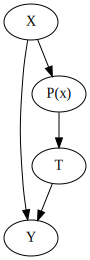

In [39]:
g = gr.Digraph()
g.edge("T", "Y")
g.edge("X", "Y")
g.edge("X", "P(x)")
g.edge("P(x)", "T")
g

P(x)에 대한 통제는 X에 대한 통제와 동일한 방식으로 작동합니다. 사고 방식 프로그램의 관점에서 봤을때, Treatment 받은 그룹과 Treatment 받지 않은 그룹은 처음에 비교할 수가 없습니다. 왜냐하면 성공에 대해 더욱 동기부여가 되어 있는 사람은 Treatment를 받고 인생에서 더 많은 것을 성취할 가능성이 높기 때문입니다. 하지만 Treatment 받은 그룹과 Treatment를 받지 않은 Control 그룹에서 각각 한 명씩 Treatment를 받을 확률이 같도록 선택한다면 이것은 비교 가능(Comparable)합니다. 만약 이 두명의 Treatment를 받을 확률이 정확하게 같다면, 그들 중 1명은 Treatment를 받고 나머지 한 명이 Treatment를 받지 못한 유일한 이유는 우연으로 발생한 결과입니다. 따라서 성향 점수를 일정하게 유지하는 것은 데이터를 랜덤과 같이 보이게 작용됩니다.

이제 직감을 얻었으니, 수학적으로 한 번 보죠.
우리는 수학적으로 $(Y_1, Y_0) \perp T | P(x)$가 $E[T|P(x), X] = E[T|P(x)]$인지 보이면 됩니다.

이것은 단순히 내가 $P(x)$를 조건으로 두면 X가 T에 대한 추가 정보를 줄 수 없다는 것을 의미합니다. 조금 이상하지만, 위 방정식을 단순한 방법으로 변환하여 참임을 보여줄 수 있습니다.

먼저 왼쪽의 수식 $E[T|P(x), X]$을 보시죠.

$E[T|P(x), X] = E[T|X] = P(x)$

우리는 여기서 $P(x)$가 X의 함수라고 가정하고 진행하기 때문에, $P(x)$에 대한 조건화를 하면 X 자체에 대한 조건화 이후에는 더 이상의 정보를 제공해주지 않습니다. 그럼 성향 점수가 $E[T|X]$라는 정의를 활용해봅시다. 오른쪽 식에서는 전체 기대의 법칙 $E[A] = E[E[A|B]]$를 활용합니다. 이 법칙을 따르면 우리는 A의 값을 B로 분해한 다음 평균함으로써 A의 기대값을 계산할 수 있습니다.

$E[T|P(x)] = E[E[T|P(x),X]|P(x)] = E[P(x)|P(x)] = P(x)$

첫번째 =는 전체 기대의 법칙에서 비롯됩니다. 두 번째는 우리가 왼쪽 식을 다룰 때 알아낸 것입니다. 왼쪽과 오른쪽의 식이 모두 같기 때문에 $P(x)$는 위 식과 같습니다.

## Propensity Weighting

![img](./data/img/ps/balance.png)

우리가 해야 할 일은 성향 점수를 조건화만 하면 됩니다. 예를 들어, 우리는 모든 X가 아니라 성향 점수로만 조건화하는 선형 회귀 분석을 생각해볼 수 있습니다. 우선, 성향 점수만 단순히 활용하고 다른 것은 사용하지 않은 기법을 살펴봅시다. 아이디어는 성향 점수로 평균의 조건부 차이를 작성하는 것입니다.


$E[Y|X,T=1]−E[Y|X,T=0] = E\bigg[\dfrac{Y}{P(x)}|X,T=1\bigg]P(x) - E\bigg[\dfrac{Y}{(1-P(x))}|X,T=0\bigg](1-P(x))$

우리는 이 식을 좀 더 단순히 할 수 있지만 성향 점수가 무엇인지 직관을 얻을 수 있기 때문에 위 식으로 살펴 보겠습니다. 첫번째 항은 $Y_1$을 추정하는 것입니다.

Treatment를 받은 모든 사람을 Treatment의 역확률로 측정하는 것입니다. 이것이 하는 일은 Treatment를 받을 가능성이 매우 낮은 사람들에게 높은 가중치를 주는 것입니다. 만약에 누군가가 Treatment를 받을 가능성이 낮다면 그 개인에게 높은 가중치를 부여합니다. 이렇게 하면 원본의 크기가 같지만 모든 대상이 Treatment를 받는 데이터가 생성됩니다. 같은 논리로 다른 용어는 처리되지 않은 것을 보고 처리된 것처럼 보이는 것에 높은 가중치를 부여합니다. 이 추정은 IPTW라고 합니다.

이 가중치가 수행하는 작업은 아래 그림과 같습니다.

![img](./data/img/ps/iptw.png)

왼쪽 상단 플롯은 원본 데이터를 보여줍니다. 파란색 점은 Treatment를 받지 않는 그룹이며, 빨간색 점은 Treatment를 받은 그룹입니다. 왼쪽의 하단 플롯은 성향 점수 $P(x)$를 보여줍니다. 0과 1사이에 있고 X가 증가함에 따라 증가하는 증가함수입니다. 마지막으로 오른쪽 상단 플롯은 가중치를 적용한 후의 데이터입니다. 해당 그림에서 왼쪽에 더 많은 빨간색(Treatment 받은)이 더 높은 가중치를 받았다는 사실에 주목해보세요. 마찬가지로 오른쪽에 있는 파란색 점 또한 가중치를 더 많이 받습니다.

이제 직관을 얻었으므로 위 용어를 다음과 같이 단순화할 수 있습니다.

$E\bigg[Y \dfrac{T-P(x)}{P(x)(1-P(x))}\bigg|X\bigg]$

여기에 X에 대해 적분하면 성향 점수 가중치의 추정기가 됩니다.

$E\bigg[Y \dfrac{T-P(x)}{P(x)(1-P(x))}\bigg]$

이 식은 P(x) 그리고 1-P(x)는 0보다 커야합니다. 즉, 모든 사람이 최소한 Treatment를 받을 기회와 받지 않을 기회가 있어야 합니다. 이것을 설명하는 또 다른 방법은 Treatment된 그룹의 분포와 Treatment되지 않은 분포가 겹쳐야 한다는 것입니다. 이것이 인과 추론에서의 긍정 가정입니다. 이는 직관적으로도 이해가 됩니다. 만약 Treatment 그룹과 Treatment을 받지 않는 그룹이 겹치지 않는다면 두 그룹이 매우 다르다는 것을 의미하며 한 그룹의 효과를 다른 그룹의 효과로 추정할 수 없습니다. 이러한 외삽의 방법은 불가능하지는 않지만 매우 위험합니다. 이는 남성만 Treatment를 받지만 여성도 똑같은 반응을 할 것을 가정하는 신약 테스트와 같습니다.

## 성향 점수 추정
이상적인 가정에서는 진정한 성향점수 $P(x)$를 가질 것입니다. 하지만 실제로 Treatment를 할당하는 매커니즘을 알지 못하므로 실제 상황에서는 성향 점수 $\hat{P}(x)$를 추정으로 대체해야 합니다. 성향 점수를 추정할때, 일반적은 방법은 로지스틱 회귀를 활용하는 것이지만, 그래디언트 부스팅과 같은 다른 기계학습 방법도 활용할 수 있습니다. 그래디언트 부스팅과 같은 경우에는 과적합을 피하기 위해 추가 단계가 필요합니다.

여기서는 로지스틱 회귀를 활용해보겠습니다. 즉, 데이터의 세트의 범주형 변수를 더미로 변환해야 합니다.

In [3]:
categ = ["ethnicity", "gender", "school_urbanicity"]
cont = ["school_mindset", "school_achievement", "school_ethnic_minority", "school_poverty", "school_size"]

data_with_categ = pd.concat([
    data.drop(columns=categ), # dataset without the categorical features
    pd.get_dummies(data[categ], columns=categ, drop_first=False)# categorical features converted to dummies
], axis=1)

print(data_with_categ.shape)

(10391, 32)


이제 로지스틱 회귀를 사용하여 성향 점수를 추정해 보겠습니다.

In [4]:
from sklearn.linear_model import LogisticRegression

T = 'intervention'
Y = 'achievement_score'
X = data_with_categ.columns.drop(['schoolid', T, Y])

ps_model = LogisticRegression(C=1e6).fit(data_with_categ[X], data_with_categ[T])

data_ps = data.assign(propensity_score=ps_model.predict_proba(data_with_categ[X])[:, 1])

data_ps[["intervention", "achievement_score", "propensity_score"]].head()

,intervention,achievement_score,propensity_score
0,1,0.277359,0.315486
1,1,-0.449646,0.263778
2,1,0.769703,0.344034
3,1,-0.121763,0.344034
4,1,1.526147,0.367797


첫째, 성향 점수 가중치가 실제로 모든 사람이 Treatment를 받는 사람을 재구성하는지 확인할 수 있습니다. 가중치 $1/P(x)$를 생성함으로써 그것은 모든 사람이 대우받는 인구를 만들고 가중치를 제공함으로써 $1/(1-P(x))$ 그것은 모든 사람이 Treatment 받지 못하는 인구를 만듭니다.

In [5]:
weight_t = 1/data_ps.query("intervention==1")["propensity_score"]
weight_nt = 1/(1-data_ps.query("intervention==0")["propensity_score"])
print("Original Sample Size", data.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 10391
Treated Population Sample Size 10388.443023651973
Untreated Population Sample Size 10391.484056947016


또한 성향 점수를 사용하여 교란의 증거를 찾을 수 있습니다. 모집단의 세분화가 다른 것보다 성향 점수가 더 높다면 무작위가 아닌 것이 Treatment를 유발하고 있음을 의미합니다. 동일한 것이 결과를 초래하는 경우에도 혼동을 일으킬 수 있습니다. 우리의 경우, 더 야망이 있다고 보고한 학생들이 성장 마인드셋 세미나에 참석할 확률도 더 높음을 알 수 있습니다.

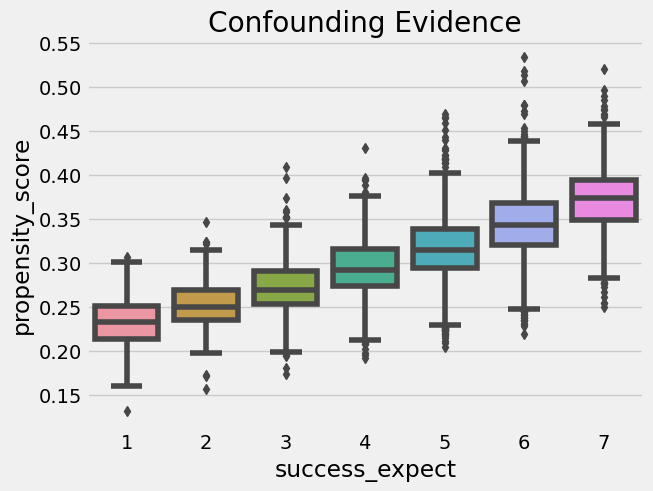

In [6]:
sns.boxplot(x="success_expect", y="propensity_score", data=data_ps)
plt.title("Confounding Evidence");

또한 Treatment를 받은 그룹와 Treatment를 받지 않은 그룹 사이에 중복이 있는지 확인해야 합니다. 이를 위해 Treatment 받지 않은 그룹과 Treatment를 받은 그룹에 대한 성향 점수의 실증적 분포를 볼 수 있습니다. 아래 이미지를 보면 성향 점수가 0인 사람이 아무도 없으며 성향 점수가 낮은 영역에서도 Treatemnt를 받은 그룹과 Treatment를 받지 않은 그룹을 모두 찾을 수 있음을 알 수 있습니다. 이렇게 Treatment이 균형적으로 처리되었음을 확인할 수 있습니다.

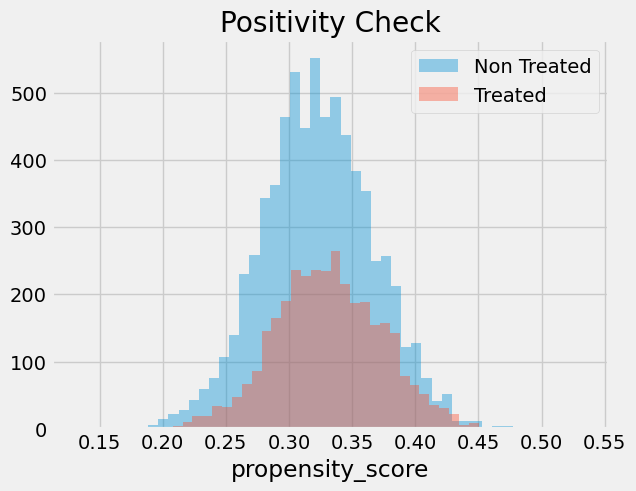

In [7]:
sns.distplot(data_ps.query("intervention==0")["propensity_score"], kde=False, label="Non Treated")
sns.distplot(data_ps.query("intervention==1")["propensity_score"], kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

마지막으로 성향 점수 가중치 추정기를 사용하여 평균 Treatment 효과를 추정할 수 있습니다.

In [8]:
weight = ((data_ps["intervention"]-data_ps["propensity_score"]) /
          (data_ps["propensity_score"]*(1-data_ps["propensity_score"])))

y1 = sum(data_ps.query("intervention==1")["achievement_score"]*weight_t) / len(data)
y0 = sum(data_ps.query("intervention==0")["achievement_score"]*weight_nt) / len(data)

ate = np.mean(weight * data_ps["achievement_score"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", np.mean(weight * data_ps["achievement_score"]))

Y1: 0.2595935900495644
Y0: -0.12893008239381742
ATE 0.38852367244338415


성향 점수 가중치는 Treatment 받은 개인이 Treatment를 받지 않은 동료보다 성취도 면에서 0.38 표준 편차가 될 것으로 기대해야 한다는 것을 의미합니다. 또한 아무도 Treatment를 받지 않은 경우 일반적인 성취 수준이 현재보다 0.12 표준 편차 낮을 것으로 예상해야 함을 알 수 있습니다. 같은 논리로 모든 사람에게 세미나를 주었다면 일반적인 성취 수준이 0.25 표준편차 더 높을 것으로 예상해야 합니다. 이것을 단순히 Treatment된 것과 Treatment되지 않은 것을 비교하여 얻은 0.47 ATE 추정치와 대조해보세요. 이것은 우리가 가지고 있는 편견이 실제로 긍정적이고 X를 통제하는 것이 성장 마인드셋의 영향에 대해 보다 Robust한 추정치를 제공한다는 증거입니다.

IPTW 추정기의 표준 오차를 계산하기 위해 가중 평균 분산 공식을 사용할 수 있습니다.

$\sigma^2_w = \dfrac{\sum_{i=1}^{n}w_i(y_i-\hat{\mu})^2}{\sum_{i=1}^{n}w_i}$

단 이는 실제 성향 점수가 있는 경우에만 사용할 수 있습니다. 추정된 성향 점수 $\hat{P}(x)$를 사용하는 경우에는 우리는 이 추정 과정의 오류를 설명해야 합니다. 이를 수행하는 가장 쉬운 방법은 전체 절차를 부스트트랩을 하는 것입니다. 원래 데이터에서 샘플링하여 위에서 진행한 절차 처럼 ATE를 계산하면 됩니다. 그런 다음 ATE 추정값의 분포를 얻기 위해 여러번 반복작업을 합니다.

In [9]:
from joblib import Parallel, delayed # for parallel processing

# define function that computes the IPTW estimator
def run_ps(df, X, T, y):
    # estimate the propensity score
    ps = LogisticRegression(C=1e6).fit(df[X], df[T]).predict_proba(df[X])[:, 1]
    
    weight = (df[T]-ps) / (ps*(1-ps)) # define the weights
    return np.mean(weight * df[y]) # compute the ATE

np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(run_ps)(data_with_categ.sample(frac=1, replace=True), X, T, Y)
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

ATE는 부트스트랩 샘플의 평균입니다. 신뢰 구간을 얻기 위해 부트스트랩 분포의 분위수를 추가합니다. 95% CI의 경우 2.5 및 97.5 백분위수를 사용합니다.

In [10]:
print(f"ATE: {ates.mean()}")
print(f"95% C.I.: {(np.percentile(ates, 2.5), np.percentile(ates, 97.5))}")

ATE: 0.38774716680017524
95% C.I.: (0.35451550730230963, 0.4199276300914874)


또한 신뢰 구간과 함께 부트스트랩 샘플이 어떻게 되어 있는지 시각적으로 확인할 수 있습니다.

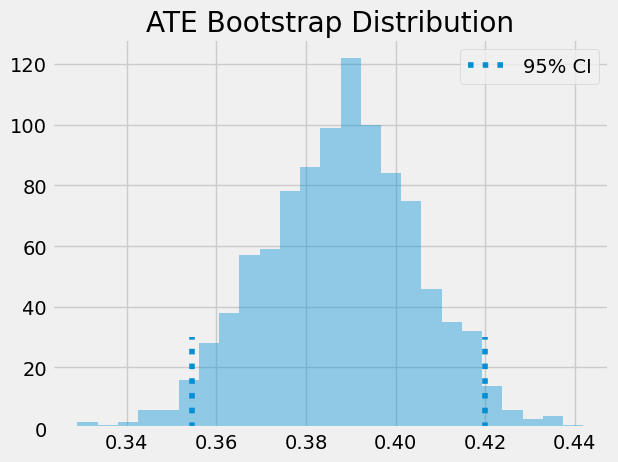

In [11]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 30, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 30, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

# 성향 점수의 일반적인 문제

데이터 과학자로서 성향 점수 추정을 가능한 한 정확하게 하기 위해 다양한 머신러닝 기법을 사용하고 싶은 유혹을 받을 수 있다는 것을 알고 있습니다. 예를 들어 AUC 최적화, 교차 검증 및 베이지안 하이퍼파라미터 조정과 같은 방식에 빠져들 수 있습니다. 본문에서는 그렇게 해서는 안된다고 말하는 것이 아닙니다. 사실 성향점수와 머신러닝에 대한 이론은 모두 아주 최근의 것이므로 우리가 아직 모르는 것이 많습니다. 그러나 먼저 아래 사항을 이해하는 것이 필요합니다.

첫 번째는 성향 점수의 예측 성능이 균형 속성으로 변환되지 않는다는 것입니다. 머신 러닝 분야에서 인과 추론에 익숙해지는 데 있어 가장 어려운 측면 중 하나는 모든 것을 예측 문제로 취급하지 않는 것입니다. 

사실, 성향 점수의 예측력을 최대화하면 인과 추론 목표가 손상될 수도 있습니다. 성향 점수는 Treatment의 확률을 잘 예측할 필요가 없습니다. 단지 모든 confounder 변수를 포함하기만 하면 됩니다. 오히려 Treatment의 확률을 예측하는 데 아무런 영향을 미치지 않는 변수를 포함하면 실제로 성향 점수 추정기의 분산이 증가합니다. 이는 Treatment와 상관관계가 있지만 결과와는 상관관계가 없는 변수를 포함할 때 선형 회귀가 직면하는 문제와 유사합니다.

이를 확인하려면 다음 예(Hernán's Book에서 발췌)를 고민해봅시다. 2개의 학교가 있으며 그 중 하나는 99%의 학생에게 성장 마인드셋 세미나를 듣게하고 다른 하나는 1%에게 듣게합니다. 그리고 학교가 Treatment의 효과에 영향을 미치지 않는다고 가정합니다(Treatment를 통한 경우 제외). 그러면 학교를 통제할 필요가 없습니다. 성향 점수 모델에 학교 변수를 추가하면 예측력이 매우 높아집니다. 그러나 우연히 학교 A의 모든 사람이 Treatment를 받은 샘플로 끝날 수 있으며, 그 결과 해당 학교에 대한 성향 점수가 1이 되며, 이는 무한 분산으로 이어질 것입니다. 이것은 극단적인 예이지만 시뮬레이션된 데이터로 어떻게 작동하는지 봅시다.

In [13]:
np.random.seed(42)
school_a = pd.DataFrame(dict(T=np.random.binomial(1, .99, 400), school=0, intercept=1))
school_b = pd.DataFrame(dict(T=np.random.binomial(1, .01, 400), school=1, intercept=1))
ex_data = pd.concat([school_a, school_b]).assign(y = lambda d: np.random.normal(1 + 0.1 * d["T"]))
ex_data.head()

,T,school,intercept,y
0,1,0,1,0.309526
1,1,0,1,1.571468
2,1,0,1,2.982024
3,1,0,1,2.445420
4,1,0,1,2.693187


이 데이터를 시뮬레이션한 후 성향 점수 알고리즘으로 부트스트랩을 두 번 실행합니다. 첫 번째는 성향 점수 모델의 특징으로 학교를 포함합니다. 두 번째로 우리는 모델에 학교를 포함하지 않습니다.

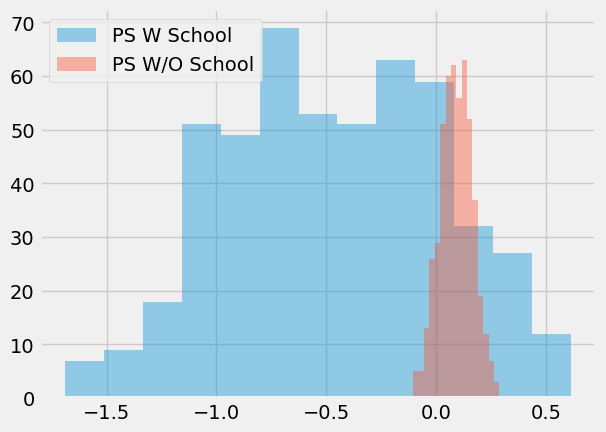

In [14]:
ate_w_f = np.array([run_ps(ex_data.sample(frac=1, replace=True), ["school"], "T", "y") for _ in range(500)])
ate_wo_f = np.array([run_ps(ex_data.sample(frac=1, replace=True), ["intercept"], "T", "y") for _ in range(500)])

sns.distplot(ate_w_f, kde=False, label="PS W School")
sns.distplot(ate_wo_f, kde=False, label="PS W/O School")
plt.legend();

보시다시피, 특성 학교를 추가하는 성향 점수 추정기는 엄청난 분산을 갖는 반면, 그렇지 않은 것은 훨씬 더 잘 작동합니다. 또한 학교는 Confounder 변수가 아니기 때문에 학교가 없는 모델도 편향되지 않습니다. 단순히 Treatment의 확률을 예측하는 것은 이러한 방식이 아닙니다. 즉, 우리는 실제로 Treatment를 예측하는 방식이 아니라 Confounder를 제어하는 ​​방식으로 예측을 구성해야 합니다.

이는 성향 점수 방법에서 자주 접하게 되는 또 다른 문제로 이어집니다. 사고 방식의 경우 데이터가 매우 균형 잡힌 것으로 나타났습니다. 하지만 항상 그런 것은 아닙니다. 어떤 상황에서는 Treatment를 받은 사람이 Treatment를 받지 않은 사람보다 Treatment 받을 확률이 훨씬 더 높고 성향 점수 분포가 많이 겹치지 않습니다.

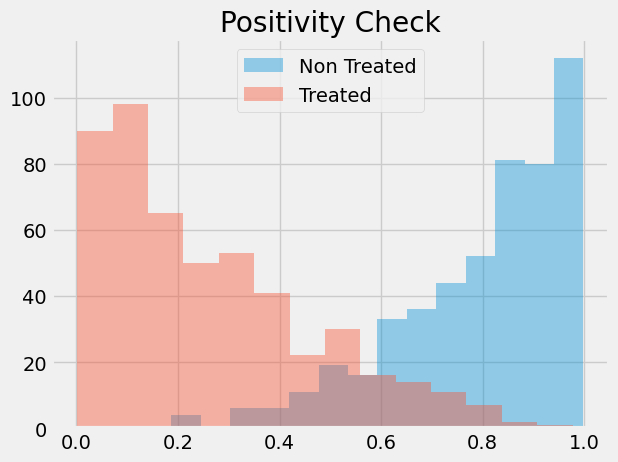

In [15]:
sns.distplot(np.random.beta(4,1,500), kde=False, label="Non Treated")
sns.distplot(np.random.beta(1,3,500), kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

이런 일이 발생하면 positivity가 그다지 강하지 않다는 것을 의미합니다. Treatment를 받은 그룹의 성향 점수가 예를 들어 0.9이고 Treatment를 받지 않은 그룹의 최대 성향 점수가 0.7인 경우 성향 점수가 0.9인 개인과 비교할 Treatment를 받지 않은 사람은 없습니다. 이러한 균형의 불균형은 약간의 편향을 생성할 수 있습니다. 왜냐하면 Treatment 효과를 알려지지 않은 영역으로 추정해야 하기 때문입니다. 뿐만 아니라 성향 점수가 매우 높거나 낮은 객체는 가중치가 매우 높아 분산이 증가합니다. 일반적으로 가중치가 20보다 높으면 문제가 있는 것입니다(성향 점수 0.95로 처리되지 않은 경우 또는 성향 점수 0.05로 처리된 경우 발생).

대안은 가중치를 최대 크기 20으로 자르는 것입니다. 이렇게 하면 분산이 줄어들지만 실제로는 더 많은 편향이 발생합니다. 솔직히 말해서, 이것이 분산을 줄이기 위한 일반적인 방법이지만 별로 좋은 방법은 아닌것 같습니다. 클리핑으로 유발하는 편향이 너무 많은지 절대 알 수 없습니다. 또한 분포가 겹치지 않으면 데이터가 인과 관계 결론을 내리기에 충분하지 않을 수 있습니다. 이에 대해 좀 더 직관하기 위해 성향 점수와 앞에서 배운 매칭 기법을 결합할 수 있습니다.

전에 말했듯이, 성향 점수가 있을 때 X를 통제할 필요가 없습니다. 이와 같이 성향 점수는 특징 공간에 대한 일종의 차원 축소를 수행하는 것으로 생각할 수 있습니다. X의 모든 기능을 단일 차원으로 압축합니다. 이러한 이유로 성향 점수를 다른 모델의 입력 기능으로 취급할 수 있습니다. 회귀 모델을 예로 들어 보겠습니다.

In [16]:
smf.ols("achievement_score ~ intervention + propensity_score", data=data_ps).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.0770,0.065,-47.055,0.000,-3.205,-2.949
intervention,0.3930,0.019,20.974,0.000,0.356,0.430
propensity_score,9.0552,0.200,45.307,0.000,8.663,9.447


성향 점수를 제어하는 ​​경우 이제 ATE를 0.39로 추정합니다. 이는 성향 점수를 제어하지 않은 회귀 모델에서 이전에 얻은 0.47보다 낮습니다. 성향 점수에 대한 매칭을 사용할 수도 있습니다. 이번에는 모든 X Feature 에서 유사한 일치 대상을 찾으려고 하는 대신 동일한 성향 점수를 가진 일치 대상을 찾을 수 있습니다.

이것은 차원의 저주를 다루기 때문에 일반적인 Matching 추정기보다 크게 개선되었습니다. 또한 어떠한 Feature가 Treatment 할당에 중요하지 않은 경우 성향 점수 모델은 이를 학습하고 Treatment 메커니즘을 맞출 때 중요도를 낮춥니다. 반면에 Features 대한 Matching은 중요하지 않은 Features에 대해 개인이 유사한 일치 항목을 찾으려고 시도합니다.

우리가 볼 수 있듯이, 우리는 성향 점수 가중치와 함께 이전에 본 것과 더 일치하는 0.38의 ATE 값을 얻었습니다. 성향 점수을 활용한 Matching은 또한 Treatment 그룹과 Control 그룹 사이에 성향 점수가 약간 겹치는 것이 위험한 이유에 대한 약간의 직관을 제공합니다. 이런 일이 발생하면 일치하는 장에서 보았듯이 성향 점수 불일치가 커져 편향이 발생합니다.

여기서 마지막으로 주의해야 할 점은 위의 Stadard errors는 성향 점수 추정의 불확실성을 설명하지 않기 때문에 잘못되었다는 것입니다. 불행히도 부트스트랩은 matching과 함께 활용하지 않습니다 . 또한 위의 이론은 너무 최근에 나온 것이기 때문에 올바른 standard errors가 있는 성향 점수를 구하는 방법을 python에서 구현한 것이 없습니다. 이러한 이유로 우리는 Python에서 Propensity score matching 방법을 활용한 것을 많이 찾아 볼 수 없습니다.

## Key Ideas

여기서 우리는 Treatment를 받을 확률을 성향점수라고 하고 이것을 균형점수로 활용할 수 있다는 것을 배웠습니다. 이것이 의미하는 것은 성향 점수가 있다면 Confounder를 직접 제어할 필요가 없으며, 인과관계를 파악하기 위해서 성향점수를 통제하는 것으로 충분합니다. 본 챕터에서는 성향 점수가 Confounder의 공간에서 차원 축소로 작용하는 방식을 보았습니다.

이러한 속성을 통해 인과 추론을 위한 가중치 추정기를 도출할 수 있었습니다. 그뿐만 아니라 성향 점수가 Confounder에 의한 bias를 제어하기 위해 Matching과 어떻게 활용할 수 있는지 보았습니다.

그런 다음, 성향 점수와 일반적으로 인과 관계 추론에서 발생할 수 있는 몇 가지 일반적인 문제를 살펴보았습니다. 첫 번째는 Treatment 할당의 매커니즘을 맞추는 작업에만 집중할 때 입니다. 우리는 Treatment 할당에 대한 예측 성능을 높이는 것이 분산을 증가시킬 수 있다는것을 보았고, 인과적 추정으로 해석되지 않는다는 것을 보았습니다.

마지막으로, Treatment 그룹의 성향점수와 control 그룹의 성향점수의 분포가 겹치지 않을 때 발생할 수 있는 몇 가지 외삽 문제를 살펴보았습니다.


## References

이 책을 쓰기 위해 Joshua Angrist, Alberto Abadie, Christopher Walters의 대단한 계량 경제학 수업 자료를 많이 참고했습니다. 해당 자료에 있는 대부분의 아이디어는 전미경제학회(American Economic Association)의 수업에서 가져왔어요. 이렇게 좋은 참고자료를 보는 것이 2020년의 힘든 한 해를 지탱하게 만들어준 원동력이었다고 생각해요.

* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

또한, Angrist의 정말 좋은 책들을 참고자료에 넣고 싶어요. 해당 저자가 쓴 책들은 계량경제학(Econometrics) 또는 '메트릭스(Metrics, 계량적 분석)'가 매우 유용할 뿐만 아니라 매우 흥미롭다는 걸 알려주었어요.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering ‘Metrics](https://www.masteringmetrics.com/)

마지막으로 참고한 자료는 Miguel Hernan과 Jamie Robins의 책입니다. 이 책들은 제가 대답해야 했던 까다로운 인과적인 질문에서 신뢰할 수 있는 동반자 같은 존재였어요.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

해당 챕터에 사용된 데이터는 Susan Athey과 Stefan Wager [Estimating Treatment Effects with Causal Forests: An Application](https://arxiv.org/pdf/1902.07409.pdf)에서 제공하고 있습니다.

## Contribute

Causal Inference for the Brave and True는 인과추론, 통계학에 대한 오픈소스 자료입니다. 이 자료는 금전적으로나 지적으로 접근이 가능할 수 있도록 하는 것이 목표입니다. 그리고, 이 책은 Python 기반의 무료 소프트웨어만 사용해요. 여러분들께서 이 자료가 가치 있다고 생각하시고, 금전적으로 지원을 원하신다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)를 방문해주세요. 만약 여러분이 금전적으로 기여하기가 쉽지 않으시다면, 오타 수정, 수정 제안, 이해하기 난해한 부분에 대한 피드백 제공 등을 통해 도움을 주실 수 있어요. 이 책의 Github 저장소 [이슈 페이지](https://github.com/matheusfacure/python-causality-handbook/issues)를 방문해주세요. 마지막으로 이 자료가 여러분의 마음에 드셨다면 도움이 될 수 있는 다른 사람들과 공유해주시고, 이 책의 [Github 자료에 star](https://github.com/CausalInferenceLab/Causal-Inference-with-Python) 부탁드립니다!